# Making Graphs for the Paper

In [ ]:
#all_slow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

## Figure 3: Ring Counts
This compiles the `ring_counts_top_losses_xxx.csv` files generated by the `count_in_crops_*.ipynb` files. 

In [ ]:
data_names = ['cleaner','preclean','spnet','cyclegan']
csv_files = ['ring_count_top_losses_'+x+'.csv' for x in data_names]
dfs = [pd.read_csv(x) for x in csv_files]

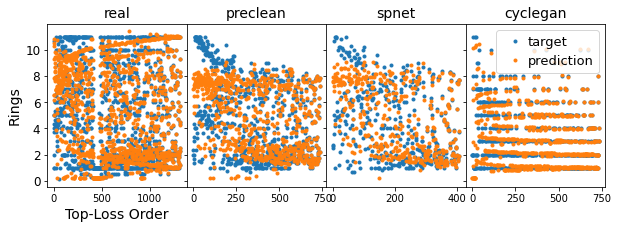

In [ ]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1,4, wspace=0, hspace=0)
axs = gs.subplots( sharey=True)
for i, df in enumerate(dfs):
    if i != 0: axs[i].set_title(data_names[i],fontsize=14)
    else: axs[i].set_title('real',fontsize=14)
    axs[i].plot(df["target"],'o',label='target', markersize=3)
    axs[i].plot(df["prediction"],'o',label='prediction', markersize=3)
    axs[i].yaxis.set_tick_params(labelsize='large')
    #axs[i].xaxis.set_tick_params(labelsize='large')
    plt.yticks(np.arange(0, 12, 2))

axs[3].legend(loc='upper right', prop={'size': 13}, handletextpad=0.01)#, framealpha=0.5)
axs[0].set_ylabel('Rings', fontsize=14)
axs[0].set_xlabel('Top-Loss Order', fontsize=14)


plt.savefig('top_losses_row.png', bbox_inches='tight')

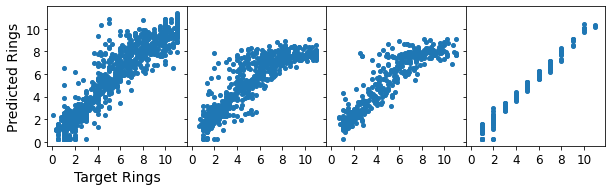

In [ ]:
fig = plt.figure(figsize=(10,3))
gs = fig.add_gridspec(1,4, wspace=0, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

for i, df in enumerate(dfs):
    #axs[i].plot(df["target"],'o',label='target')
    #axs[i].plot(df["prediction"],'o',label='prediction')
    axs[i].plot(df["target"],df["prediction"],'o',markersize=4)
    axs[i].axis('square')
    axs[i].yaxis.set_tick_params(labelsize='large')
    axs[i].xaxis.set_tick_params(labelsize='large')

plt.xticks(np.arange(0, 12, 2))
plt.yticks(np.arange(0, 12, 2))
axs[0].set_xlabel('Target Rings', fontsize=14)
axs[0].set_ylabel('Predicted Rings', fontsize=14)
plt.savefig('ring_tfs_row.png', bbox_inches='tight')

## Seg-Reg needs IceVision-friendly env
Will need to restart from a different kernel/env from the above